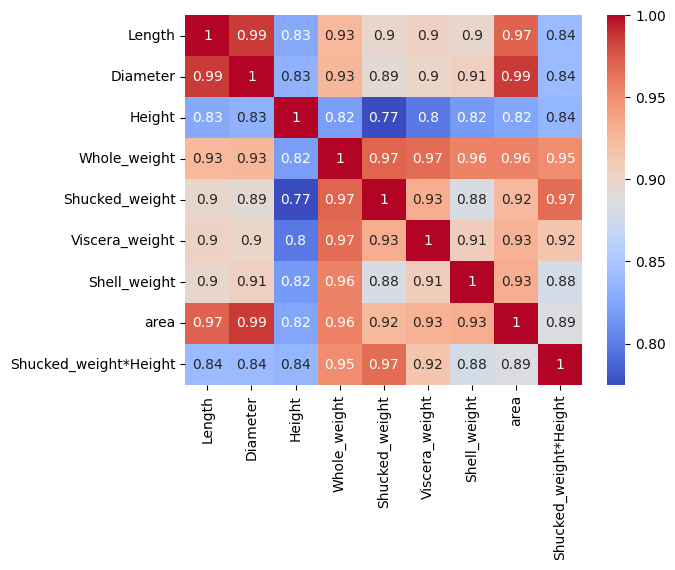

In [30]:
from ucimlrepo import fetch_ucirepo
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
abalone   = fetch_ucirepo(id = 1)
# abalone = pd.get_dummies(abalone, columns = ['Sex'])

X = pd.DataFrame(abalone.data.features)
y = abalone.data.targets #age of abalones determined by its number of rings 


X['area'] = np.pi * (X['Diameter']/2) ** 2


# Way of imputation lets see ok 

numerical_columns = X.select_dtypes(include = ['int64', 'float64']).columns
categorical_columns = X.select_dtypes(exclude = ['int64', 'float64']).columns

X.loc[:, numerical_columns] = X.loc[:,numerical_columns].fillna(X[numerical_columns].median())

for columns in categorical_columns: 

    X.loc[:,columns] = X.loc[:, columns].fillna(X[columns].mode()[0])
                                                                    
# print(abalone.metadata.additional_info.summary)
X = X[numerical_columns]

X['Shucked_weight*Height'] = X['Shucked_weight'] * X['Height']

correlation_matrix = X.corr()

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
# Label encoding , instead of One hot encoding for categorical datas 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

abalone['Sex'] = le.fit_transform(abalone['Sex'])




# Implementing KNN imputer 

In [ ]:
# using KNNImputer to impute missing values 
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
abalone = imputer.fit_transform(abalone)

# Implementing PCA 

In [ ]:
# importing PCA
from sklearn.decomposition import PCA

# specifying the number of components (dimensions) we want to reduce our data to
pca = PCA(n_components=3)

# Apply the PCA transform to our data
abalone_pca = pca.fit_transform(abalone)

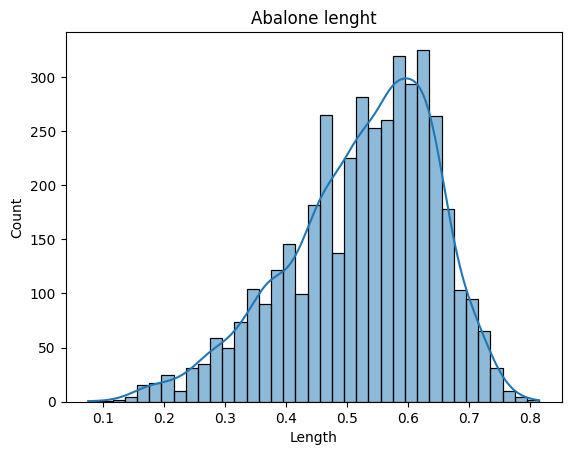

In [21]:
#Visulaizing abalone length using sns 
'''import seaborn as sns 
import matplotlib.pyplot as plt 

feature = X[X.columns[1]]

sns.histplot(data  = feature, kde= True) #kernel density estimation
plt.title("Abalone lenght")
plt.show()'''

In [ ]:
#Select K Best Method for Feature Selection 
''' 
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

#One-hot encode "Sex" feature
X = pd.get_dummies(X)
#Convert y to 1D array
y = y.values.ravel()

# Assume X and y to be the feature set and target variable
best_features = SelectKBest(score_func=chi2, k=3) # We choose top 3 features
fit = best_features.fit(X,y)
print(fit.get_feature_names_out()) #prints ['Whole_weight' 'Sex_F' 'Sex_I'] 

'''

In [ ]:
#Recursive Feature Elimination for Feature Selection 

''' 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=250)
rfe = RFE(model, n_features_to_select= 3) # We choose top 3 features
fit = rfe.fit(X, y)
print(fit.get_feature_names_out())#prints ['Whole_weight' 'Shucked_weight' 'Shell_weight']
'''

In [ ]:
'''
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5).fit(X, y)
sfm = SelectFromModel(lasso)
fit = sfm.fit(X,y) 
print(fit.get_feature_names_out()) 
#prints ['Diameter' 'Height' 'Whole_weight' 'Shucked_weight' 'Viscera_weight' 'Shell_weight' 'Sex_I' 'Sex_M']

'''

In [ ]:
#x.corr()['Rings']